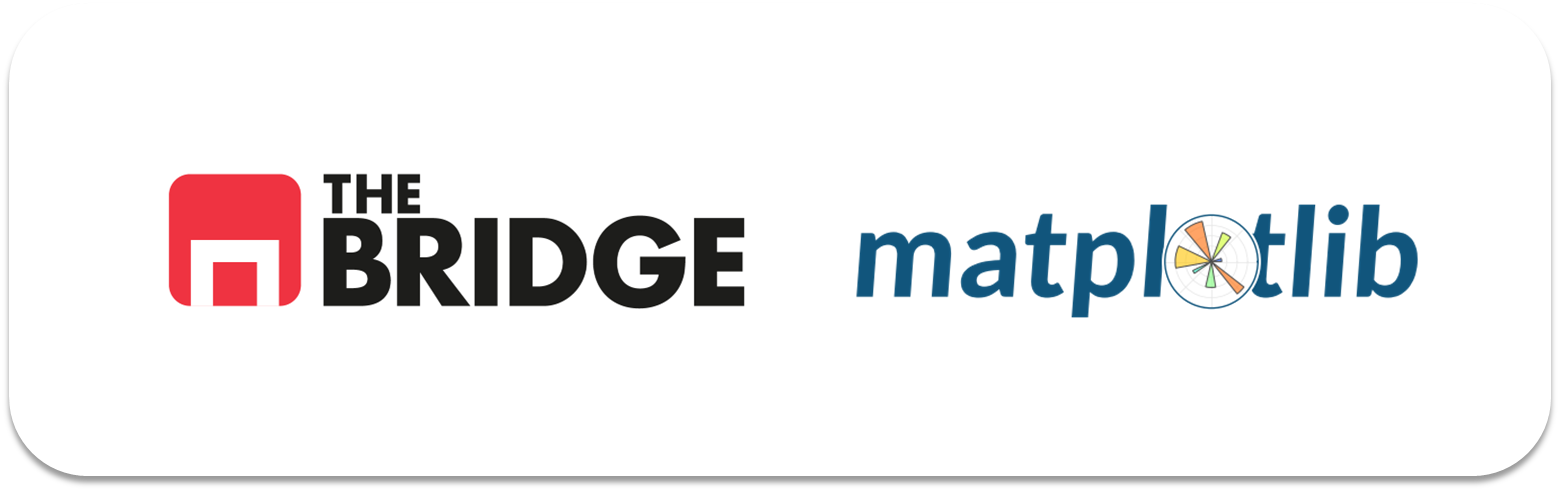

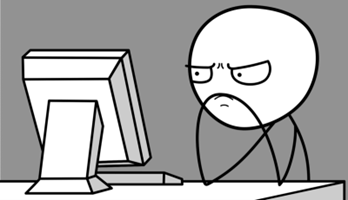

Para ejercitarte y afianzar lo aprendido sobre gráficas de Matplotlib, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### Ejercicio 1


Carga tu qerido dataset del titanic, en la ruta "./data/titanic.csv", no hace falta que hagas limpieza.

In [5]:
titanic_data = pd.read_csv("./data/titanic.csv")
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Ejercicio 2



Crea el histograma de la variable `age` de forma que se reproduzca la siguiente figura (tiene 30 bines)

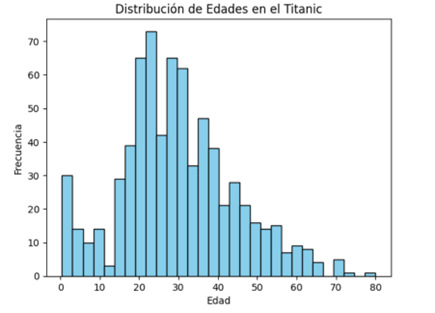

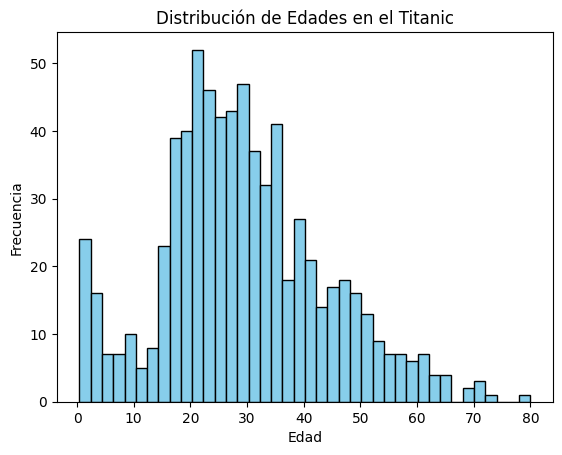

In [18]:


# Histograma de las edades
plt.hist(titanic_data['age'].dropna(), bins=40, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


### Ejercicio 3

¿Cuáles son los 3 intervalos de valores con mayor número de viajeros según el gráfico anterior? ¿Obtén también el número de viajeros en cada uno?

[18.99-21.64]:65.0
[21.64-24.29]:73.0
[26.95-29.6]:65.0


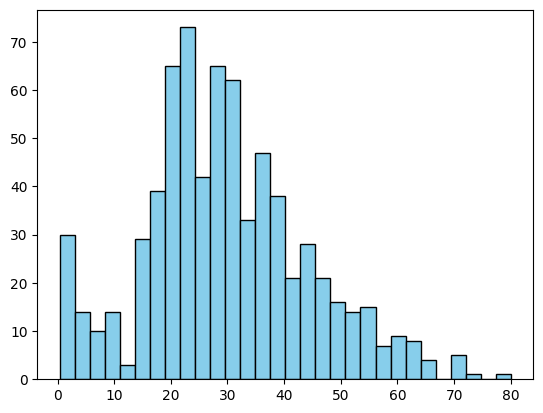

In [19]:
datos = plt.hist(titanic_data['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
### Obtenidos los valores hacemos dos series para poder manipularlos
conteo = pd.Series(datos[0])
intervalos = pd.Series(datos[1])
for indice in conteo.nlargest(3).index.sort_values(): # Necesito los intervalos que corresponden al 
                                        # valor de intervalos de cada índice y el siguiente valor
                                        # además ordenados para que se vean los intervalos ordenados
    print(f"[{intervalos[indice].round(2)}-{intervalos[indice+1].round(2)}]:{conteo[indice]}") 

### Ejercicio 4

Obten el diagrama de caja del precio del billete usando las funciones de matplotlib y reproduciendo la siguiente figura (tendrás que bucear un poco en los parámetros, y usar patch_artist = True, el tamaño de los bigotes está ajustado a 3 IQRs):

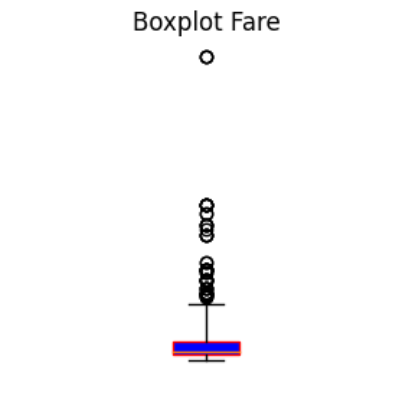

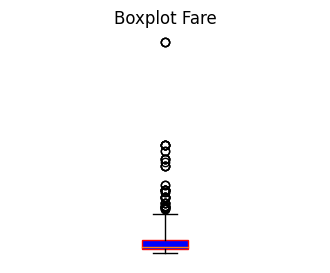

In [20]:
plt.figure(figsize = (4,3))
plt.boxplot(titanic_data["fare"], boxprops= {"facecolor": "blue", "color": "red"}, 
            patch_artist= True, whis = 3)
plt.axis("off")
plt.title("Boxplot Fare")
plt.show()


### Ejercicio 5

Crea el gráfico de frecuencias absolutas y relativas de las ciudades de embarque del Titanic de forma que repodruzcan la siguiente figura:

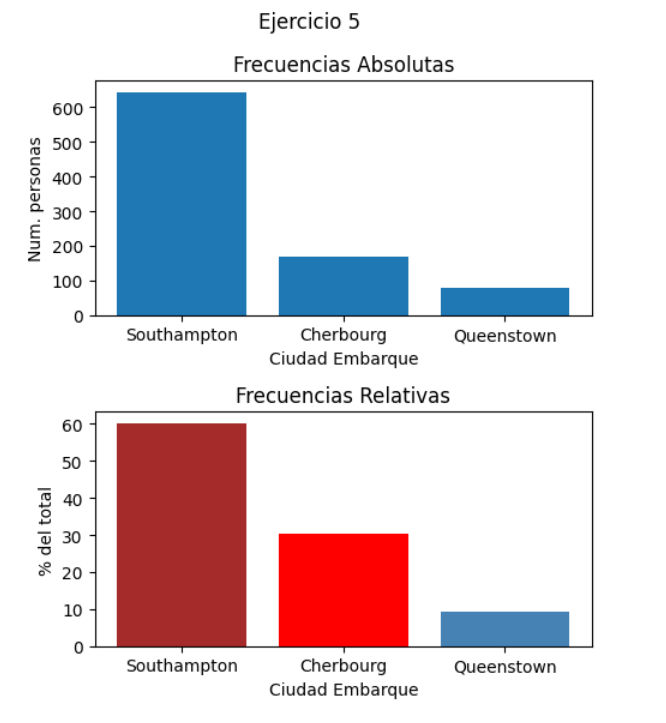

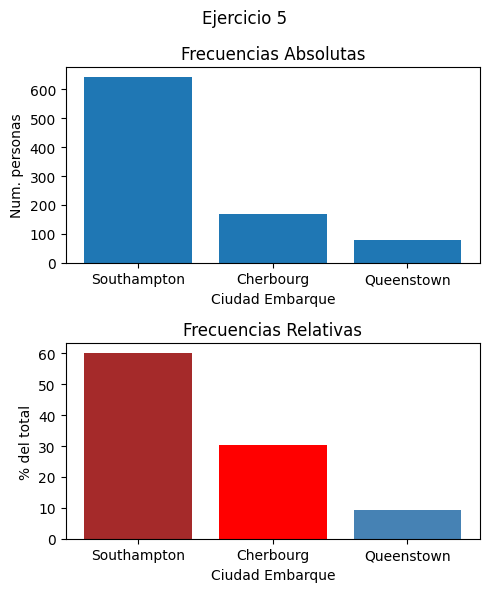

In [21]:
# frecuencias absolutas
categorias = titanic_data.embark_town.value_counts().index.to_list()
frecuencias = titanic_data.embark_town.value_counts().to_list()
# frecuencias relativas
frec_relativas = (titanic_data.who.value_counts(normalize = True) * 100).to_list()
fig,ax = plt.subplots(2,1, figsize = (5,6))
fig.subplots_adjust(wspace = 0.5)
plt.suptitle("Ejercicio 5")
ax[0].bar(categorias, frecuencias)
ax[0].set_title("Frecuencias Absolutas")
ax[0].set_xlabel("Ciudad Embarque")
ax[0].set_ylabel("Num. personas")
ax[1].bar(categorias, frec_relativas, color = ["brown","red","steelblue"])
ax[1].set_title("Frecuencias Relativas")
ax[1].set_xlabel("Ciudad Embarque")
ax[1].set_ylabel("% del total")
plt.tight_layout()


### Ejercicio 6

Crea el gráfico de dispersión entre el precio y la edad, de forma que reproduzca el siguiente gráfico (tendrás que emplear el argumento alpa)

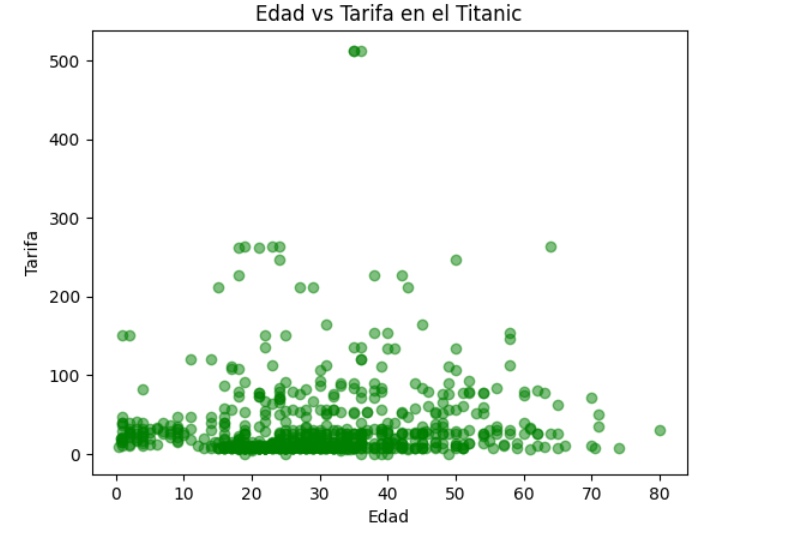

Text(0, 0.5, 'fare')

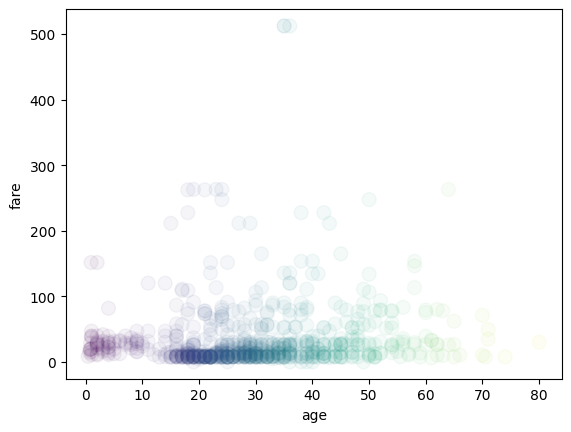

In [26]:
plt.scatter(titanic_data["age"], titanic_data["fare"], c =titanic_data.age, alpha = 0.05, s = 100)
plt.xlabel ("age")
plt.ylabel("fare")

### Ejercicio 7

Vamos a obtener el precio medio por edad, de la siguiente forma agrupa por edad y calcula la media de la tarifa, luego haz lo mismo pero calculando la desviación de estándar. Guarda los resultados en dos variables distintas.

In [22]:
mean_fare_by_age = titanic_data.groupby('age')['fare'].mean()
std_fare_by_age = titanic_data.groupby('age')['fare'].std()

### Ejercicio 8

Considerando las medias como un conjunto de medidas y las desviaciones como el error de las mismas construye un diagrama de errores que reproduzca la siguiente figura, usando (£) como moneda:

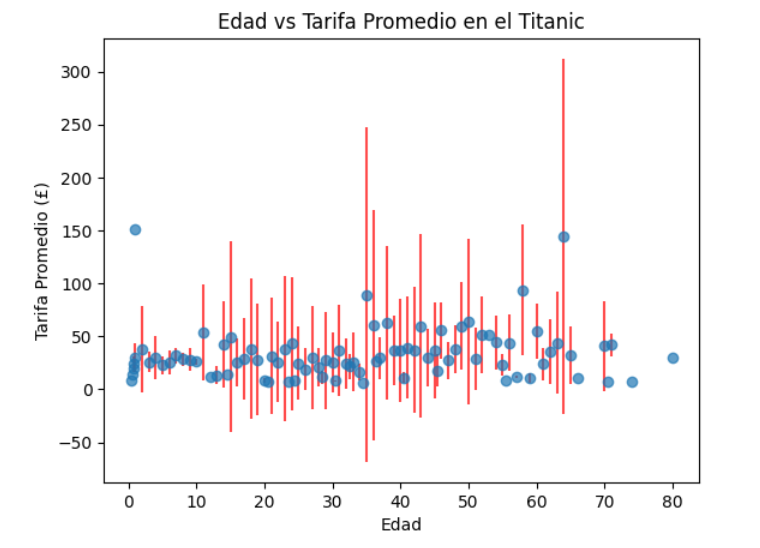

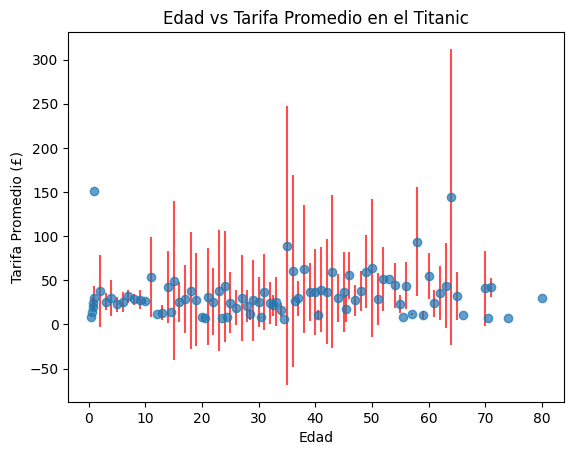

In [27]:


plt.errorbar(mean_fare_by_age.index, mean_fare_by_age, yerr=std_fare_by_age, fmt='o', ecolor='red', alpha=0.7)
plt.title('Edad vs Tarifa Promedio en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Tarifa Promedio (£)')
plt.show()


EXTRA: Pinta los cuatro primeros gráficos conjuntamente en una sóla figura como la que ves a continuación:

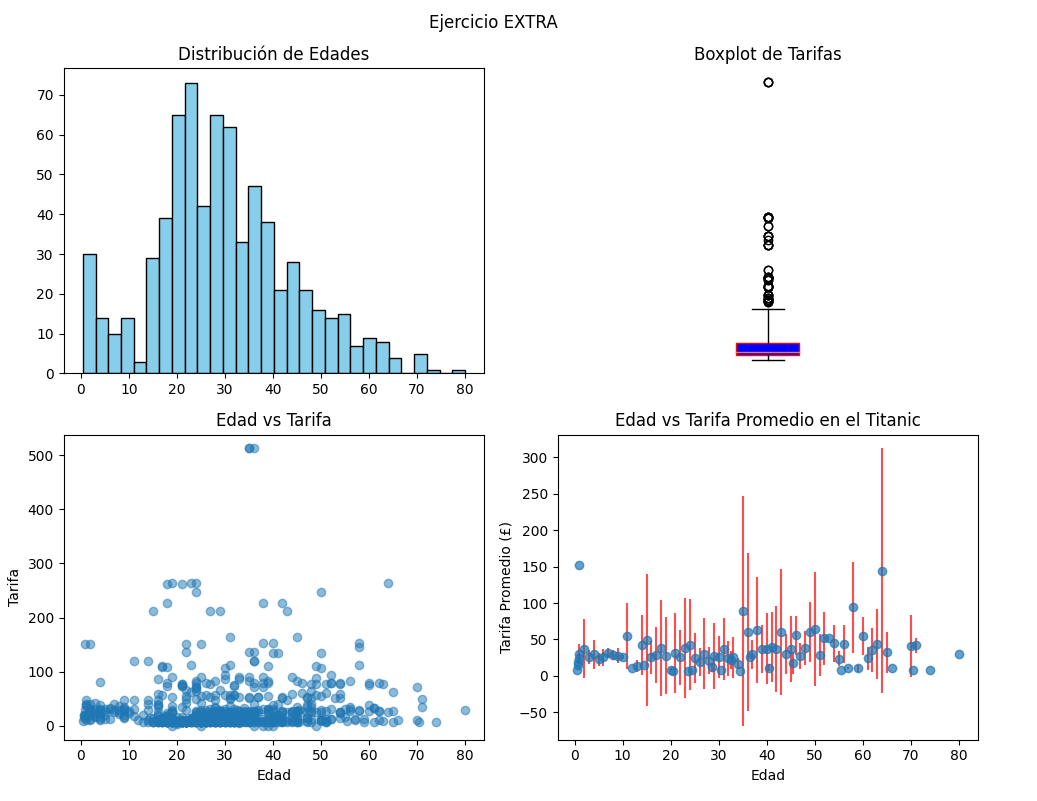

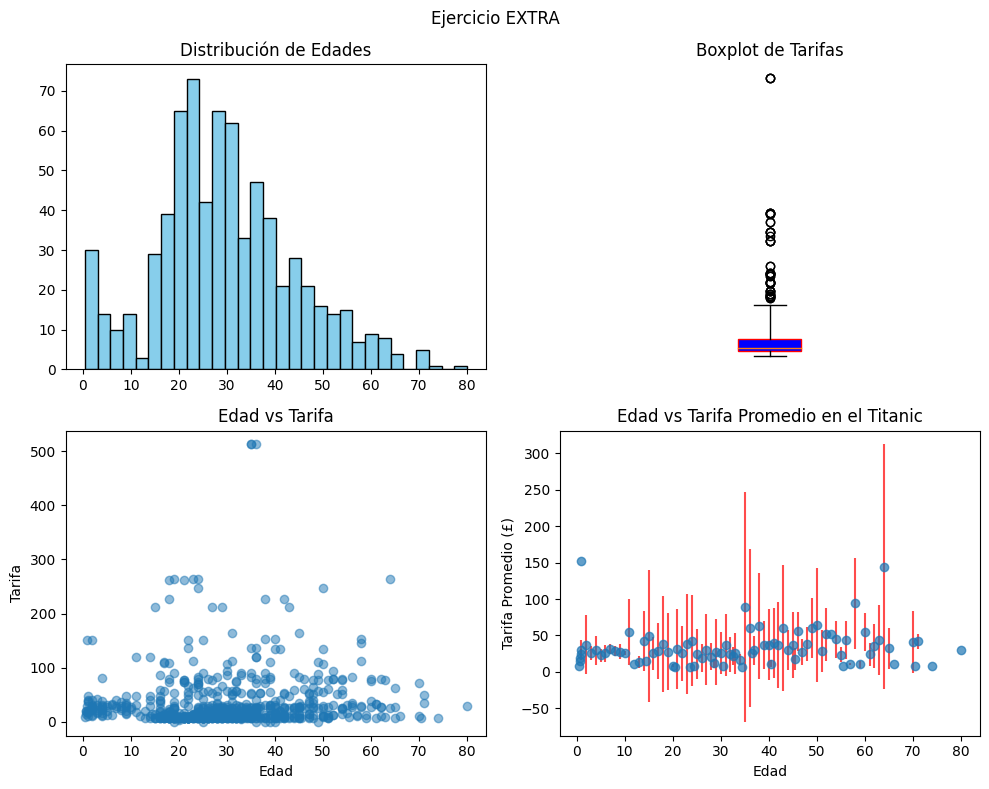

In [28]:

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Histograma 
axs[0, 0].hist(titanic_data['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribución de Edades')

# Boxplot
axs[0, 1].boxplot(titanic_data["fare"], boxprops= {"facecolor": "blue", "color": "red"}, 
            patch_artist= True, whis = 3)
axs[0, 1].set_title('Boxplot de Tarifas')
axs[0, 1].axis("off")

# Dispersion
axs[1, 0].scatter(titanic_data['age'], titanic_data['fare'], alpha=0.5)
axs[1, 0].set_title('Edad vs Tarifa')
axs[1, 0].set_xlabel('Edad')
axs[1, 0].set_ylabel('Tarifa')

# Gráfico de Errores
axs[1, 1].errorbar(mean_fare_by_age.index, mean_fare_by_age, yerr=std_fare_by_age, fmt='o', ecolor='red', alpha=0.7)
axs[1,1].set_title('Edad vs Tarifa Promedio en el Titanic')
axs[1,1].set_xlabel('Edad')
axs[1,1].set_ylabel('Tarifa Promedio (£)')

plt.suptitle("Ejercicio EXTRA")

plt.tight_layout()
plt.show()